# Module 2: Integrals and ders

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [ ]:
#Problem 1.1 & 1.2
import numpy as np
#increases the printed decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.15f}".format(x)})
def f(x):
  return 2*x**4+3*x**2+4*x+5
#Trapezoidal rule
def trap(a,b,n):
  h=(b-a)/n
  s=0
  for i in range(n-1):
    s+=f(a+h*(i+1))
  return (h/2*(f(a)+f(b)+2*s))
I=1450  #True value of the integral
for i in range(1,4):
  print(f"n={10**i}: I={trap(0,5,10**(i+1))} error={(abs(trap(0,5,10**(i+1))-I)/I)*100}%")


n=10: I=1450.2145812500003 error=0.014798706896569988%
n=100: I=1450.002145833123 error=0.00014798849124104138%
n=1000: I=1450.000021458334 error=1.47988510371792e-06%


**Problem 1.1 & 1.2 Discussion**\
A function was defined to carry out the numerical calculation for a given integral using trapezoidal rule. The inputs for this functions are the interval and the number of slices. A 'for' loop was used to calculate the summation part of the trapezoidal rule. The definite integral was then determined for 10, 100, and 1000 slices. Using the true value of the integral calculated analytically, which is 1450, the percentage error was determined for each number of slices. All the estimates are printed above along with their corresponding percentage error. It can be observed that the higher the number of slices the more accurate the result.

In [ ]:
#Problem 1.3 & 1.4
import numpy as np
#increases the printed decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.15f}".format(x)})
def f(x):
    return 2*x**4+3*x**2+4*x+5
#Simpson's Rule
def simpson(a,b,n):
  h=(b-a)/n
  simp=f(a)+f(b)
  for k in range (1,n,2):
    simp+=4*f(a+(k*h))
  for k in range (2,n,2):
    simp+=2*f(a+(k*h))
  return h*simp/3
I=1450  #True value of the integral
for i in range(3):
  print(f"I = {simpson(0,5,10**(i+1))}  error = {100*abs(simpson(0,5,10**(i+1))-I)/I}%")



I = 1450.0833333333333  error = 0.005747126436776382%
I = 1450.0000083333337  error = 5.747126657485657e-07%
I = 1450.000000000834  error = 5.75176994155707e-11%


**Problem 1.3 & 1.4 Discussion**\
A function was defined to numerically calculate the same integral using Simpsons rule. Two 'for' loops were used to calculate the summation for even and odd values of N. The value for 10, 100 and 1000 slices were determined and their respectively percentage error was calculated using the true value. The output approximations are printed above alongside their percentage errors.

Comparing this result to the previous method, the Simpson's rule provided us with a more accurate result for the same number of slices, making it more reliable.


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [ ]:

#Problem 2.1
import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2
def summation(f,a,b,N):
	h = (b - a)/N
	s = 0
	for k in range(1,N//2+1):
		s+=f(a + (2*k-1)*h)
	return s*h
a,b = 0,1
I = (b-a)/2*(f(b)+f(a)) #trapezoidal rule estimate for N=1
epsilon,N=1,1
i=0
a_trap_e,a_trap_N=[],[]
a_Trap = np.zeros((100,1)) #This matrix will hold the calculated estimates
a_Trap[0,0]=I
print(f'N = {N}:  I = {I}')
#Generates the next estimates using the adaptive trapezoidal rule method
while epsilon>10**(-6):
	N*=2
	i+=1
	I_prev = a_Trap[i-1,0]
	I_new = I_prev/2 + summation(f,a,b,N)
	epsilon = abs(I-I_new)/3
	a_Trap[i,0]=I_new
	I = I_new
	a_trap_e.append(epsilon)
	a_trap_N.append(N)
		
	print(f'N = {N}:  I = {I}  \u03F5 = {epsilon}')


N = 1:  I = 0.147979484546652
N = 2:  I = 0.3252319078064746  ϵ = 0.05908414108660753
N = 4:  I = 0.5122828507233315  ϵ = 0.06235031430561896
N = 8:  I = 0.4029974484782483  ϵ = 0.03642846741502772
N = 16:  I = 0.43010336929474696  ϵ = 0.009035306938832885
N = 32:  I = 0.4484146657874699  ϵ = 0.0061037654975743165
N = 64:  I = 0.4539129312153758  ϵ = 0.0018327551426352933
N = 128:  I = 0.45534850437280205  ϵ = 0.000478524385808754
N = 256:  I = 0.455711266453241  ϵ = 0.00012092069347964991
N = 512:  I = 0.45580219965166413  ϵ = 3.0311066141042176e-05
N = 1024:  I = 0.45582494813241997  ϵ = 7.582826918613635e-06
N = 2048:  I = 0.45583063620164654  ϵ = 1.896023075524204e-06
N = 4096:  I = 0.455832058278271  ϵ = 4.740255414859007e-07


**Problem 2.1 Discussion**\
Initially, a function was defined to solve for a summation term that will be used to determine the next trapezoidal approximation later. Then, a $100\times1$ matrix was set up to contain the numerical approximations for doubling values of $N$. Row ($i$) holds the output for $N=2^i$. I needed to store these values to be able to call them later.

The first definite integral corresponding to $N=2^0=1$ of the given equation was determined using the traditional trapezoidal rule from the previous problem. In order to compute for the next approximation with twice the value of $N$, I needed to call the previous approximation and add the summation term defined earlier. The error was then calculated using the new and the previous approximation. In order to automate this process until an $\epsilon = 10^{-6}$ accuracy is achieved, a 'while' loop was used. It was found that the target accuracy is in between $N=2048$ and $N=4096$.

 Finally, the values of $N$ and their corresponding approximation were stored in lists for later.

In [ ]:
#Problem 2.2

import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2
def summation(f,a,b,N):
	h = (b - a)/N
	s = 0
	for k in range(1,N//2+1):
		s+=f(a + (2*k-1)*h)
	return h*s
a,b = 0,1
I = (b-a)/2*(f(b)+f(a)) #trapezoidal rule estimate for N=1
epsilon,N=1,1
Rom = np.zeros((100,100)) #This matrix will hold the calculated estimates
Rom[0,0]=I
i=0
Rom_N,Rom_e=[],[]
print(f'N = {N}:  I = {I}')
#Calculates the next estimates using Romberg method
while epsilon>10**(-6):
	N*=2
	i+=1
	I_prev = Rom[i-1,0]
	I_new = I_prev/2 + summation(f,a,b,N)
	Rom[i,0] = I_new
	for m in range(i):
		Rom[i,m+1] =Rom[i,m] + 1/(4**(m+1)-1)*(Rom[i,m] - Rom[i-1,m])
	epsilon = abs(Rom[i,m+1]-Rom[i,m])
	I = Rom[i,m+1]
	Rom_e.append(epsilon)
	Rom_N.append(N)
	print(f'N = {N}:  I = {I}  \u03F5 = {epsilon}')



N = 1:  I = 0.147979484546652
N = 2:  I = 0.38431604889308213  ϵ = 0.05908414108660753
N = 4:  I = 0.5873209727713417  ϵ = 0.0126878077423912
N = 8:  I = 0.34897386185747614  ϵ = 0.0037241736080291243
N = 16:  I = 0.4458037647108326  ϵ = 0.0003782418080209293
N = 32:  I = 0.4557774922310969  ϵ = 9.739968281519129e-06
N = 64:  I = 0.45583249446137863  ϵ = 1.3428278877736233e-08


**Problem 2.2 Discussion**\
In order to evaluate the Romberg integration, I needed to start with the codes I did for the adaptive trapezoidal rule. I have pictured the Romberg tree illustrated in the book to be inside a matrix; I set up a $100\times100$ matrix which would allow me build the Romberg tree. This would also allow me to store and call previously calculated values to further refine the estimates generated from the adaptive trapezoidal rule.

Row($i$) of the matrix corresponds to $N=2^i$ with the final entry of the row being the value of the Romberg integration. Initially The first 2 estimates were determined using the trapezoidal rule. These were then used to calculate a more accurate estimate using the Romberg formula which utilizes the previous and the newly calculated estimates. At each successive stage, another trapezoidal rule estimate, at Rom[i,1], was calculated for the next $N$ value, then by using the Romberg formula the estimates in Rom[i,2]...Rom[i,i] were determined. The error ($\epsilon$) for this is the difference of the last entry of the row and the entry before it which is equivalent to equation 5.49 from the book. This process was iterated over and over until the desired accuracy of $\epsilon=10^{-6}$ was achieved ('while' loop was used).  It was found that the target accuracy is in between $N=32$ and $N=64$.

Finally, the values of $N$ and their corresponding approximation were stored in lists for later.

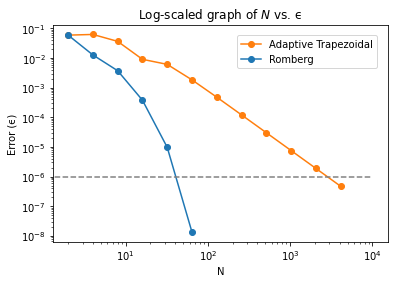

In [ ]:
#Problem 2.3
import matplotlib.pyplot as plt

#note: Please run the two previous code cells before running this

#line for the target accuracy
x=[0,10000]
y=[10**-6,10**-6]


plt.plot(a_trap_N,a_trap_e,c="tab:orange",label="Adaptive Trapezoidal", 
         marker="o")
plt.plot(Rom_N,Rom_e,c="tab:blue",label="Romberg",marker="o")
plt.plot(x,y, "--",color="gray")
plt.legend(bbox_to_anchor=(0.55, 0.95), loc='upper left', borderaxespad=0.)
plt.title("Log-scaled graph of $N$ vs. \u03F5")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Error (\u03F5)")
plt.show()

**Problem 2.3 Discussion**\
The predefined lists of the $N$ values and their corresponding estimate for both the adaptive trapezoidal rule and the Romberg integration were called from the previous subsections. These values were then plotted on a log-scaled graph to effectively investigate the trends they follow. It was observed that the Romberg integration approaches the desired accuracy (represented as a dashed line) with less number of steps. This makes Romberg a more efficient method (at least for this case). The trend from the adaptive trapezoidal rule on the other hand, subtly resembles a line, so at some part, $N$ could have a definite power relationship with $\epsilon$. 

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In [ ]:
import numpy as np

#Problem 3.1

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w
    
#Problem 3.2
#determines the integral of the given function
def f(x):
  return 2*x**4+3*x**2+4*x+5
N=3
a=0
b=5
x,w=gaussxw(N)
xp=(b-a)/2*x+(b+a)/2
wp=(b-a)/2*w
s=0.0
#calculating the final value
for k in range (N):
  s+=wp[k]*f(xp[k])
print(f'Integral = {s}')

Integral = 1450.000000000002


**Problem 3 Discussion**\
The given algorithm *gaussxw* determined first the initial approximation of the Legendre polynomial and proceeds to find the roots using Newton's method. It then returns points $x$ and the calculated weights of integration $w$ such that upon  a certain calculation with these values, it produces the $N^{th}$ order Gaussian approximation over the standard interval of -1 to 1.

In order to modify the output to cater the integral between two specified points, first I have calculated the sample points and weights using *gaussxw*, then mapped them to the required integration domain (the process of *gaussxwab*) so that it can be applied to the given interval. After, I performed the integration process by adding a summation term that uses the rescaled positions and weights (using a 'for' loop). Finally, the numerical calculation for the integral of the given equation was determined which is $1450.000000000002$, and it has an error of $1.38\times10^{-15}$% from the true value (solved by a calculator). This method is amazingly efficient because with only 3 slices it provided us with a more accurate integration than the previous methods.

### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

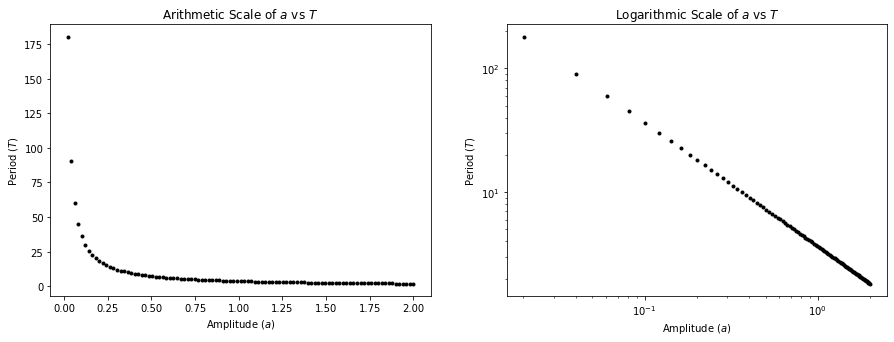

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Problem 4.1
#note: Please run gaussxw from the previous problem before running this
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
m = 1
n = 20

def T(a):
    def f(x):
        V = lambda x: x ** 4
        return 1 / np.sqrt(V(a) - V(x))
    xp, wp = gaussxwab(n, 0, a)
    I = 0.0
    for i in range(n):
        I += wp[i] * f(xp[i])
    return np.sqrt(8*m) * I

#Problem 4.2
fig, axs = plt.subplots( ncols = 2, figsize = (15, 5))
a = np.linspace(0, 2, 100)
a = np.delete(a,0)
period = list(map(T, a))
axs[0].plot(a, period, 'k.')
axs[0].set_title('Arithmetic Scale of $a$ vs $T$')
for ax in axs.flat:
    ax.set(xlabel='Amplitude ($a$)',ylabel='Period ($T$)')
plt.title("Logarithmic Scale of $a$ vs $T$")
plt.plot(a, period, 'k.')
plt.xlabel('Amplitude ($a$)')
plt.ylabel('Period ($T$)')
plt.xscale("log")
plt.yscale("log")
plt.show()


**Problem 4 Discussion**\
The *gaussxw* function from the previous problem was used to find the value of the integral of the given equation for period. First, a function (*gaussxwab*) was defined to return the integration points and weights mapped to the specified interval, and upon some needed calculations, it would produce the $N^{th}$ order Gaussian approximation of the integral. Then, a function for the period was defined, and the integration part will be numerically calculated using the function *gaussxwab* upon supplying the needed parameters. 100 values of $a$ ranging from $a=0$ to $a=2$ were generated. These values were then mapped into the defined function for the period. Finally, the set of $a$ values and the set that contains the corresponding period were plotted on a graph.

The arithmetic graph shows a function that diverges at $a=0$. This shows that the period is inversely proportional to the amplitude. The lower the amplitude the particle oscillates, the longer the time it takes for it to complete a cycle.

Interestingly, if the same graph was log-scaled, it shows a linear relationship which indicates that there could exist a definite power relationship between the  period and the amplitude of the particle.

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the der of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the der and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

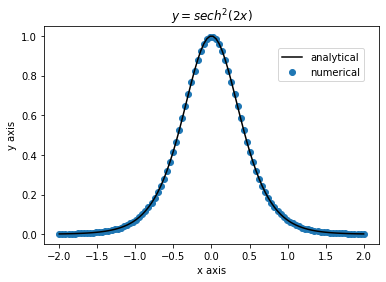

In [ ]:
from math import tanh,cosh
import matplotlib.pyplot as plt
import numpy as np

#Problem 5.1 & 5.2
def f(x):
  return 1+tanh(2*x)/2
a=-2
b=2
N=100
def der_num(x):
  h=(b-a)/N #I chose this because it will be the distance 
            # between each x value
  return (f(x + h) - f(x - h)) / (2*h)

def der_a(x):
  return 1/cosh(2*x) ** 2

x=np.linspace(b,a,N)
y_der_num=[]
y_der_anal=[]

for i in range (N): #numerical calculation -- Problem 5.1
  y_der_num.append(der_num(x[i]))

for k in range (N): #analytical calculation -- Problem 5.2
  y_der_anal.append(der_a(x[k]))

plt.scatter(x,y_der_num,label='numerical')
plt.plot(x,y_der_anal,"k",label='analytical')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)
plt.title("$y = sech^2(2x)$")
plt.show()


**Problem 5 Discussion**\
First, the formula to numerically determine the derivative of the given equation was defined. $h$ was set to the distance between the generated points. The predefined function was then evaluated to 100 equidistant points between $x=-2$ and $x=2$. The result was plotted on a graph with dot markers. The analytical derivative of the function was predetermined using a derivative calculator, and then it was superimposed on the graph.

 The trend of the series of points highly fits the analytical graph of the derivative of the given equation. Additionally, it was observed that at higher values of $h$, greater than the distance between the x values, the points fit the curve less and less.